In [1]:
%tensorflow_version 2.x
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn as sns
sns.set()
from tensorflow import keras
from tensorflow.keras.layers import *
from sklearn.linear_model import LogisticRegression, SGDClassifier 
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score


# Task 1

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


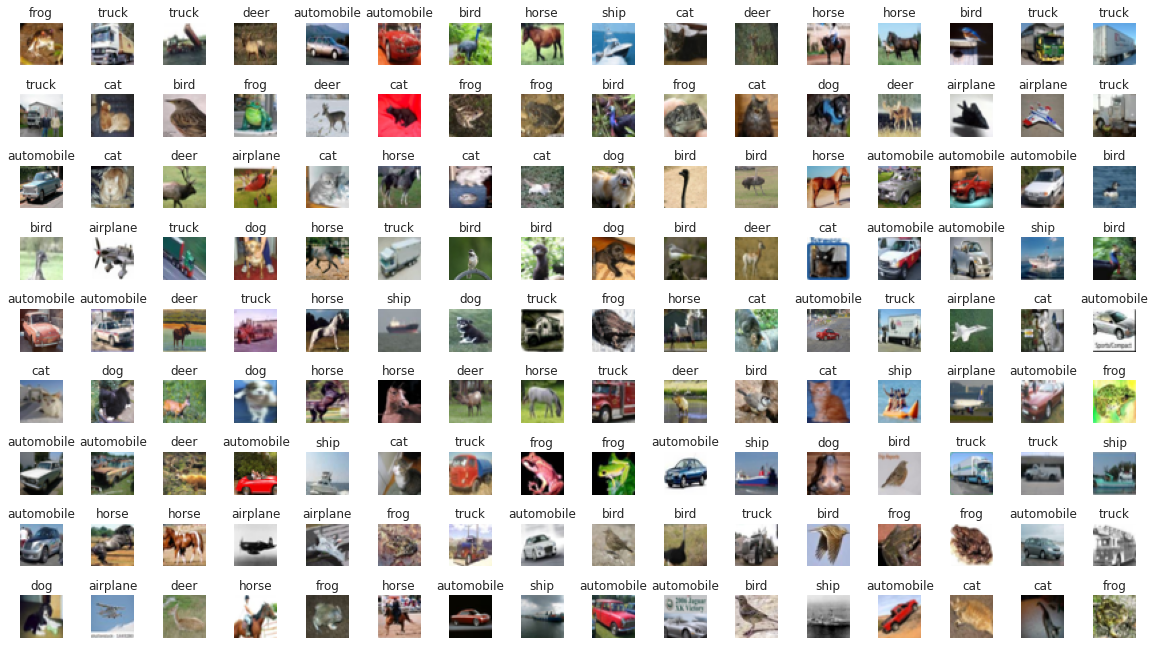

In [3]:
cifar10classes = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 
                  5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
fig = plt.figure(1, (20., 15.))
grid = ImageGrid(fig, 111, nrows_ncols=(9, 16), axes_pad=0.4)

for i in range(144):
    grid[i].imshow(x_train[i])
    grid[i].set_title(cifar10classes[y_train[i][0]])
    grid[i].axis('off')

In [4]:
# normalizing the data
x_train = x_train / 255
x_test = x_test  / 255
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
# reshaping the data
x_train = x_train.reshape((50000,32*32*3))
x_test = x_test.reshape((10000,32*32*3))
x_train.shape, x_test.shape

((50000, 3072), (10000, 3072))

In [6]:
%%time
lr = LogisticRegression(multi_class='multinomial', n_jobs=-1).fit(x_train, y_train.ravel())
pred1 = lr.predict_proba(x_test)

CPU times: user 432 ms, sys: 523 ms, total: 955 ms
Wall time: 2min 4s


In [7]:
# binarizing the labels
le = preprocessing.LabelBinarizer()
le.fit(y_train)
le.fit(y_test)
y_train_b = le.transform(y_train)
y_test_b = le.transform(y_test)

For multinomial the loss minimised is the multinomial loss fit across the entire probability distribution.

In [8]:
# computing ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

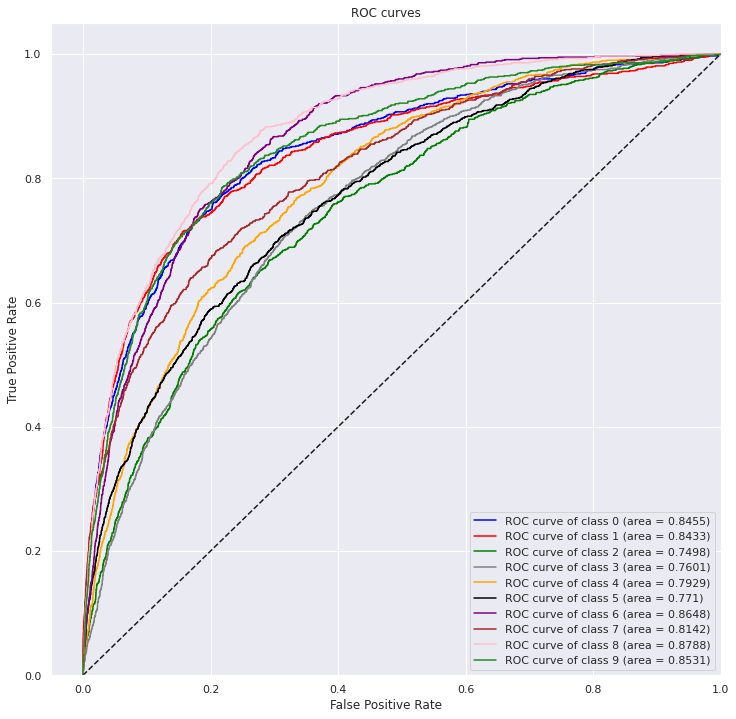

In [9]:
from itertools import cycle


# ROC curve for each class
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

colors = ['blue', 'red', 'green', 'gray', 'orange', 'black', 'purple', 'brown', 'pink', 'forestgreen']

plt.figure(figsize=(12, 12))
for i, color in zip(range(10), colors):
    
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label=f'ROC curve of class {labels[i]} (area = {round(roc_auc[i], 4)})')
    

plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()

In [10]:
print('accuracy:', accuracy_score(np.argmax(y_test_b, axis=1), np.argmax(pred1, axis=1)))

accuracy: 0.4063


# Task 2

In [11]:
%%time
sgd = SGDClassifier(loss='modified_huber', n_jobs=-1).fit(x_train, y_train.ravel())
pred2 = sgd.predict(x_test)

CPU times: user 15min 55s, sys: 341 ms, total: 15min 56s
Wall time: 8min 8s


Hinge loss gives back a linear svm, with log loss we have a logistic regression, so I chose modified_huber to see something new.

In [12]:
print('accuracy:', accuracy_score(y_test, pred2,1))

accuracy: 0.2786


SGD classifier is a linear classifier with stochastic gradient descent learning, the exact type of the model depends on the chosen loss. It can be a SVM, logistic regression, etc

# Task 3

In [13]:
%%time
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(random_state=42, n_jobs=-1).fit(x_train, y_train.ravel())
pred3 = rfc.predict_proba(x_test)

CPU times: user 5min 10s, sys: 266 ms, total: 5min 11s
Wall time: 2min 37s


In [14]:
# computing ROC curve and ROC area for each class
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()

for i in range(10):
    fpr2[i], tpr2[i], _ = roc_curve(y_test_b[:, i], pred3[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])

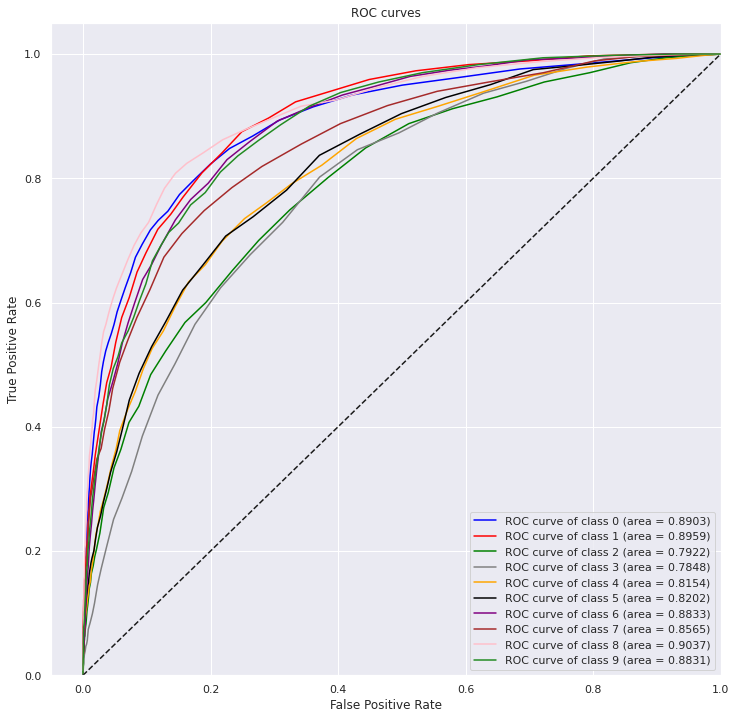

In [15]:
plt.figure(figsize=(12, 12))
for i, color in zip(range(10), colors):
    
    plt.plot(fpr2[i], tpr2[i], color=color, lw=1.5, label=f'ROC curve of class {labels[i]} (area = {round(roc_auc2[i], 4)})')
    

plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()

In [16]:
print('accuracy:', accuracy_score(y_test, np.argmax(pred3,1)))

accuracy: 0.4654


# Task 4

In [17]:
%%time
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(max_iter = 30).fit(x_train, y_train.ravel())
pred4 = mlp.predict_proba(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 2min 42s, sys: 58.7 s, total: 3min 40s
Wall time: 1min 53s


In [18]:
# computing ROC curve and ROC area for each class
fpr3 = dict()
tpr3 = dict()
roc_auc3 = dict()

for i in range(10):
    fpr3[i], tpr3[i], _ = roc_curve(y_test_b[:, i], pred4[:, i])
    roc_auc3[i] = auc(fpr3[i], tpr3[i])

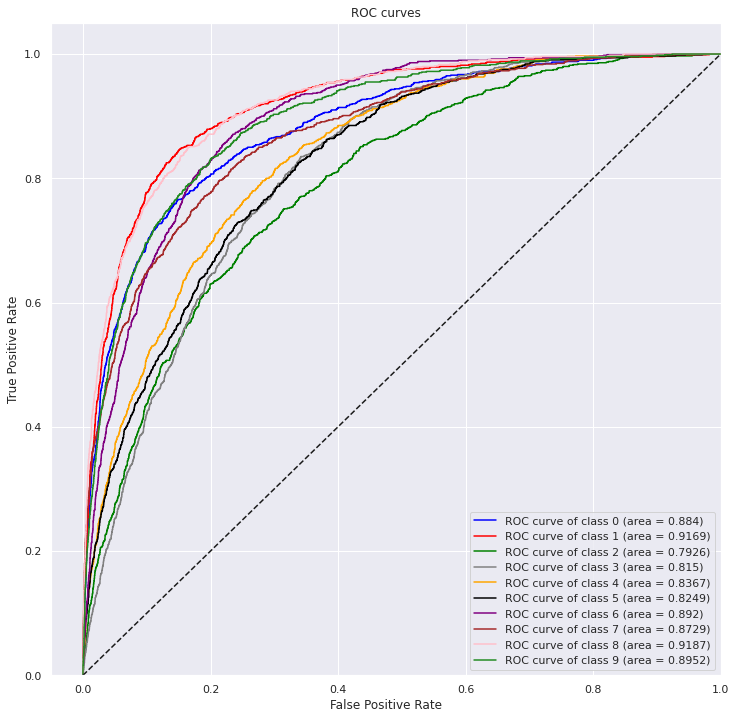

In [19]:
plt.figure(figsize=(12, 12))
for i, color in zip(range(10), colors):
    
    plt.plot(fpr3[i], tpr3[i], color=color, lw=1.5, label=f'ROC curve of class {labels[i]} (area = {round(roc_auc3[i], 4)})')
    

plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()

In [20]:
print('accuracy:', accuracy_score(y_test, np.argmax(pred4,1)))

accuracy: 0.4656


# Task 5

In [30]:
# loading the data again to get an unmodified version
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [31]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [32]:
import tensorflow as tf
from keras.applications.resnet50 import preprocess_input


train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(32)

In [33]:
backbone = keras.applications.ResNet50(weights='imagenet', include_top = False)
backbone.trainable = True

In [52]:
def my_own_model():
  inp = tf.keras.layers.Input(shape=(32, 32, 3))
  x = preprocess_input(inp)

  x = backbone(x)
  x = keras.layers.Flatten()(x)
  x = keras.layers.Dense(64, activation='relu')(x)
  x = keras.layers.Dense(64, activation='relu')(x)
  x = keras.layers.Dropout(0.3)(x)
  x = keras.layers.Dense(32, activation='relu')(x)
  x = keras.layers.Dropout(0.1)(x)
  out = keras.layers.Dense(10, activation='softmax')(x)
  model = tf.keras.models.Model(inputs=inp, outputs=out)
  return model

In [53]:
model5 = my_own_model()

In [54]:
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
history1 = model5.fit(train_dataset, epochs=3, validation_data=test_dataset)

Epoch 1/3
1563/1563 [==============================] - 60s 39ms/step - loss: 1.4762 - accuracy: 0.4999 - val_loss: 1.4600 - val_accuracy: 0.5359
Epoch 2/3
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1994 - accuracy: 0.5960 - val_loss: 1.3611 - val_accuracy: 0.5288
Epoch 3/3
1563/1563 [==============================] - 59s 38ms/step - loss: 1.2773 - accuracy: 0.5662 - val_loss: 1.1723 - val_accuracy: 0.5890


In [56]:
pred5 = model5.predict(x_test)

In [57]:
print('accuracy:', accuracy_score(np.argmax(y_test,1), np.argmax(pred5,1)))

accuracy: 0.589
